In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset=load_digits()

X, y=dataset.data, dataset.target
 
y_binary_imbalanced =y.copy() #copy data without link address
y_binary_imbalanced[y_binary_imbalanced !=1]=0

In [4]:
X_train, X_test, y_train, y_test =train_test_split(X,y_binary_imbalanced,random_state=0)

#### Dummy

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier

dummy_classprop=DummyClassifier(strategy='stratified').fit(X_train,y_train)
y_test_pred=dummy_classprop.predict(X_test)

######Confusion Matrix
confusion=confusion_matrix(y_test,y_test_pred)

print('Random class-proportional prediction (dummy classifier)\n',confusion)

Random class-proportional prediction (dummy classifier)
 [[361  46]
 [ 39   4]]


#### logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_test_pred=lr.predict(X_test)
confusion=confusion_matrix(y_test,y_test_pred)

print('logistic regression:\n', confusion )

logistic regression:
 [[401   6]
 [  6  37]]


#### Decision tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predict=dt.predict(X_test)
confusion =confusion_matrix(y_test,tree_predict)

print('Decision tree classifier (max_depth=2)\n',confusion)

Decision tree classifier (max_depth=2)
 [[400   7]
 [ 17  26]]


#### SVM

svm prediction
 [[407   0]
 [  2  41]]


<IPython.core.display.Javascript object>


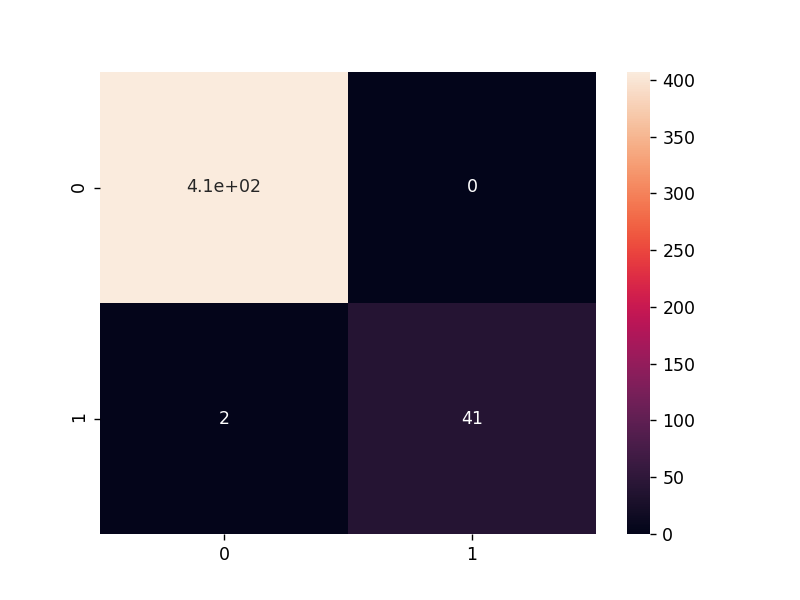

<AxesSubplot:>

In [12]:
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns

svm=SVC(kernel='rbf',C=1).fit(X_train,y_train)
svm_predict=svm.predict(X_test)
confusion=confusion_matrix(y_test,svm_predict)

print('svm prediction\n',confusion)
df_svm=pd.DataFrame(confusion,index=[0, 1], columns=[0, 1])

plt.figure()
sns.heatmap(df_svm,annot=True)